In [1]:
#!pip install imblearn --user  
#uncomment below only if imblearn is not installed 

#restart Jupyter engine again is still fails to import imblearn

In [2]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import pprint

from imblearn.over_sampling import SMOTE 

from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding='ISO-8859-1')

In [4]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
def gridSearchForLR(LRModel,X_train,y_train):
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
    logreg_cv=GridSearchCV(LRModel,grid,cv=10)
    logreg_cv.fit(X_train, y_train)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    print("accuracy :",logreg_cv.best_score_)

In [7]:
def impFeaturesforModels(importance):
    importancePerFeature = sorted(dict(zip(X_train.columns, importance)).items(),key=operator.itemgetter(1),reverse=True)
    pprint.pprint(importancePerFeature, width=1)
    #print(importancePerFeature)

In [8]:
#function to get confusion metric parameters printed

def printingConfusionMetricDetails(confusion_metric):
    TP = confusion_metric[1,1] # true positive 
    TN = confusion_metric[0,0] # true negatives
    FP = confusion_metric[0,1] # false positives
    FN = confusion_metric[1,0] # false negatives


    print('Acuracy Score', accuracy_score(y_test,y_pred_default))
    print('Sensitivity: ', TP / float(TP+FN))
    print('Specificity: ',TN / float(TN+FP))
    print('false postive rate: ',FP/ float(TN+FP))
    print('positive predictive value: ', TP / float(TP+FP))
    print('Negative predictive value: ',TN / float(TN+ FN))
    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


In [9]:
#function to pring 
def printingMSEandRsquare(y_test, y_pred):
    mean_square_err = mean_squared_error(y_test, y_pred)
    r_square = r2_score(y_test, y_pred)
    print(mean_square_err)
    print(r_square)

In [10]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [11]:
#drop mobile number  - the number is not needed for any calculation or analysis
data.drop('mobile_number',axis=1,inplace=True)

In [12]:
#check for missing values
data.isna().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
                        ... 
aon                        0
aug_vbc_3g                 0
jul_vbc_3g                 0
jun_vbc_3g                 0
sep_vbc_3g                 0
Length: 225, dtype: int64

In [13]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
188,arpu_3g_6,74.846748
176,av_rech_amt_data_6,74.846748
216,fb_user_6,74.846748
196,night_pck_user_6,74.846748
160,total_rech_data_6,74.846748
...,...,...
145,max_rech_amt_7,0.000000
144,max_rech_amt_6,0.000000
143,total_rech_amt_9,0.000000
142,total_rech_amt_8,0.000000


In [14]:
#Dropping columns where null are more than 95%
data.loc[:, data.isnull().mean() < .95]
# 1 column dropped

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


In [15]:
#DATA IMPUTATION
#We can also use MICE imputation 
#data imputation for categorical columns (fb and nigh pack users) as -1
data=data.fillna({'fb_user_6':-1,'fb_user_7':-1,'fb_user_8':-1})
data=data.fillna({'night_pck_user_6':-1,'night_pck_user_7':-1,'night_pck_user_8':-1})
#data imputation for non categorical as 0 which means no recharge happened
data=data.fillna(0)

In [16]:
#verifying imputation and null
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 225, dtype: int64

In [17]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
0,circle_id,0.0
113,std_ic_t2o_mou_7,0.0
143,total_rech_amt_9,0.0
144,max_rech_amt_6,0.0
145,max_rech_amt_7,0.0
...,...,...
79,og_others_9,0.0
80,total_og_mou_6,0.0
81,total_og_mou_7,0.0
82,total_og_mou_8,0.0


In [18]:
## No missing values now 
##Renaming columns to get them inline with month codes
data =data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [19]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               floa

In [20]:
#data.describe()
data.shape

(99999, 225)

In [21]:
#Deriving Features - 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_rech_data_6           
data['amt_data_7'] = data.total_rech_amt_7 + data.total_rech_data_7
data['amt_data_8'] = data.total_rech_amt_8 + data.total_rech_data_8

#  average recharge by customer in June and July
data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

#Retaining customers whose recharge amount is >= 70th percentile amount

data_filtered = data.loc[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(30019, 229)

In [22]:
data_filtered["last_date_of_month_6"] = pd.to_datetime(data_filtered["last_date_of_month_6"])
data_filtered["last_date_of_month_7"] = pd.to_datetime(data_filtered["last_date_of_month_7"])
data_filtered["last_date_of_month_8"] = pd.to_datetime(data_filtered["last_date_of_month_8"])
data_filtered["date_of_last_rech_6"] = pd.to_datetime(data_filtered["date_of_last_rech_6"])
data_filtered["date_of_last_rech_7"] = pd.to_datetime(data_filtered["date_of_last_rech_7"])
data_filtered["date_of_last_rech_8"] = pd.to_datetime(data_filtered["date_of_last_rech_8"])

#3 new columns for days since recharge.
data_filtered["days_since_recharge_6"] = data_filtered["last_date_of_month_6"] - data_filtered["date_of_last_rech_6"]
data_filtered["days_since_recharge_7"] = data_filtered["last_date_of_month_7"] - data_filtered["date_of_last_rech_7"]
data_filtered["days_since_recharge_8"] = data_filtered["last_date_of_month_8"] - data_filtered["date_of_last_rech_8"]

#converting into days
data_filtered["days_since_recharge_6"] = data_filtered["days_since_recharge_6"].dt.days
data_filtered["days_since_recharge_7"] = data_filtered["days_since_recharge_7"].dt.days
data_filtered["days_since_recharge_8"] = data_filtered["days_since_recharge_8"].dt.days

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                              "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]
data_filtered = data_filtered.drop(columns=date_columns_to_be_dropped)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 223 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [23]:
data_filtered.shape
#before outlier

(30019, 223)

In [24]:
# HANDLING OUTLIERS
#z_scores = stats.zscore(data_filtered)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#data_filtered = data_filtered[filtered_entries]

#Using Quantile method ##method is removing all churn_flag=1 rows
Q1 = data_filtered.quantile(0.01)
Q3 = data_filtered.quantile(0.99)
IQR = Q3 - Q1


data_filtered = data_filtered[~((data_filtered < (Q1 - 1.5 * IQR)) |(data_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26682 entries, 0 to 30018
Data columns (total 223 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [25]:
data_filtered.shape
#after outlier treatment

(26682, 223)

In [26]:
#Identifying Churn customers
data_filtered['churn_flag'] = np.where(((data_filtered['total_ic_mou_9'] == 0.00) | (data_filtered['total_og_mou_9'] == 0.00))
                            & ((data_filtered['vol_2g_mb_9'] == 0.00) | (data_filtered['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(data_filtered['churn_flag'].value_counts())


0    23956
1     2726
Name: churn_flag, dtype: int64


In [27]:
#CONSOLIDATION OF OTHER VALUES IS NEEDED 

In [28]:
#now that every column follows same naming patter drop features related to Churn Phase
data_filtered = data_filtered.drop(data_filtered.filter(regex='_9', axis = 1).columns, axis=1)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26682 entries, 0 to 30018
Data columns (total 169 columns):
circle_id                int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
l

In [29]:
#Plotting heatmap to get an overall picture
#plt.figure(figsize = (50, 30))
#sns.heatmap(data_filtered.corr(), annot = True, cmap="YlGnBu")
#plt.show()

In [30]:
## Heatmap is not of much help with large no of features
#Analysing further all numeric (float and int) variables in the dataset
#Its one and the same now ..selection is not needed .. all numeric DF
#data_numeric = data_filtered.select_dtypes(include=['float64', 'int64','int32'])

data_numeric=data_filtered
data_numeric.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,amt_data_8,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
0,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,19.38,18.74,1580.0,790.0,3638.0,1185.0,3,6,5,1
1,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,910.65,122.16,437.0,603.0,123.0,520.0,5,0,1,0
3,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,2.45,21.89,570.0,348.0,160.0,459.0,0,0,17,0
4,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,816.0,0.0,30.0,408.0,0,1,6,0
5,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,0.00,600.0,680.0,718.0,640.0,0,0,0,0


In [31]:
correlation = data_numeric.corr()
correlation

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,amt_data_8,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,NaN,1.000000,0.485554,0.381883,0.386553,0.177315,0.134430,...,0.120777,0.184192,0.927319,0.448181,0.372477,0.825563,-0.164400,0.019534,0.011543,0.063475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg_amt_data_6_7,NaN,NaN,NaN,NaN,0.825563,0.840374,0.595508,0.333686,0.326047,0.255946,...,0.154896,0.152900,0.830256,0.833401,0.553349,1.000000,-0.129382,-0.114357,-0.011135,0.002585
days_since_recharge_6,NaN,NaN,NaN,NaN,-0.164400,-0.102363,-0.034908,-0.155219,-0.133318,-0.095057,...,0.090728,0.088574,-0.193520,-0.022455,-0.056547,-0.129382,1.000000,0.229560,0.103568,-0.010861
days_since_recharge_7,NaN,NaN,NaN,NaN,0.019534,-0.200261,-0.200625,-0.046521,-0.145110,-0.168430,...,0.063073,0.083234,0.039715,-0.228826,-0.164498,-0.114357,0.229560,1.000000,0.121260,0.135460
days_since_recharge_8,NaN,NaN,NaN,NaN,0.011543,-0.072667,-0.120811,-0.009616,-0.036031,-0.061024,...,-0.016555,-0.013465,0.020161,-0.038437,-0.162416,-0.011135,0.103568,0.121260,1.000000,0.127538


In [32]:
#Top 5 correlation
print (correlation['churn_flag'].sort_values(ascending=False)[:6], '\n')

churn_flag               1.000000
std_og_mou_6             0.138610
days_since_recharge_7    0.135460
days_since_recharge_8    0.127538
std_og_t2m_mou_6         0.105027
std_og_t2t_mou_6         0.098548
Name: churn_flag, dtype: float64 



In [33]:
#Analysing categorical variables
#data_nonnum= data_filtered.select_dtypes(exclude=['float64', 'int64'])
#data_nonnum.describe()

In [34]:
data_filtered.shape

(26682, 169)

In [35]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = data_filtered
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.show()

In [36]:
recharge_amnt_columns =  data_filtered.columns[data_filtered.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()


['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

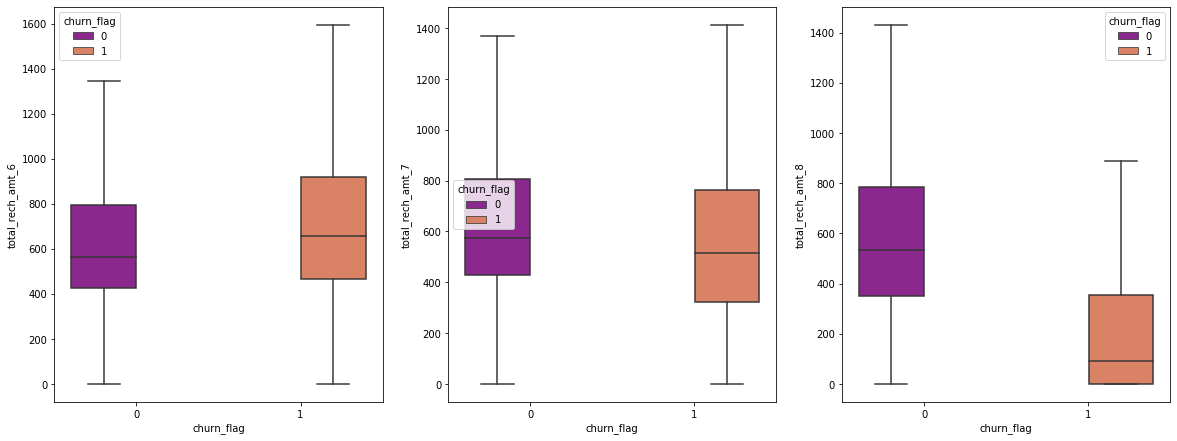

In [37]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')
#can see a drop in rechargeable amount down in 8th month for churning customers

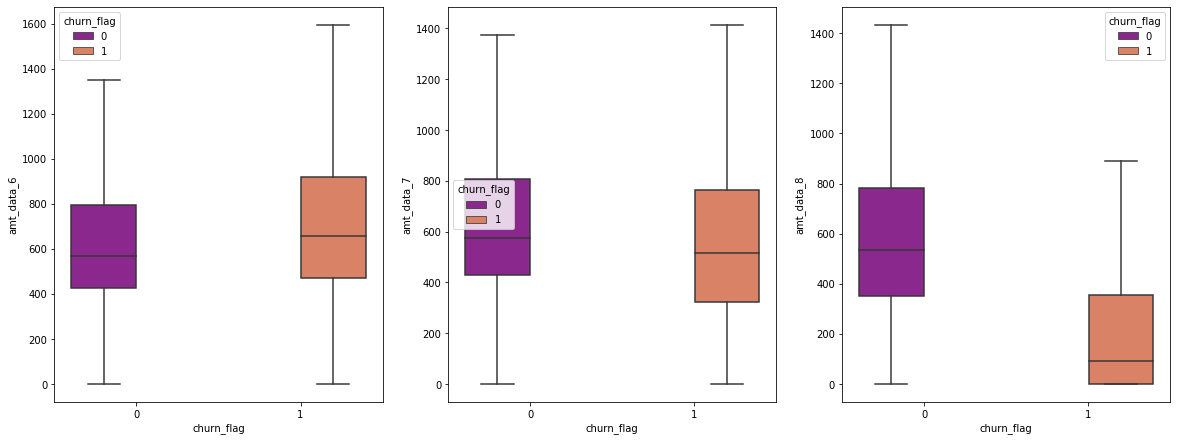

In [38]:
# Ploting for total recharge amount for data:
plot_box_chart('amt_data')
#recharge amount drops in 8th month for churning customers

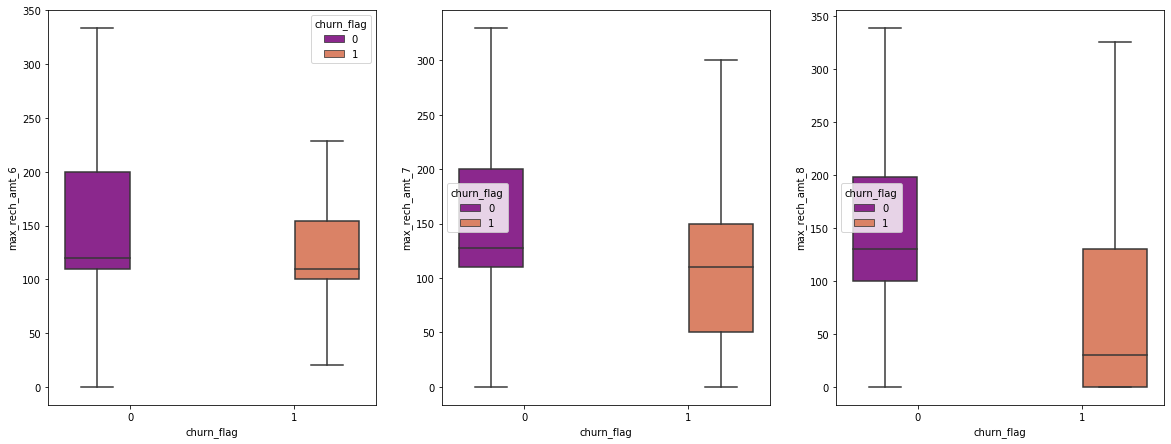

In [39]:
# Ploting for total recharge amount for data:
plot_box_chart('max_rech_amt')
#Max recharge amount drops in 8th month for churning customers

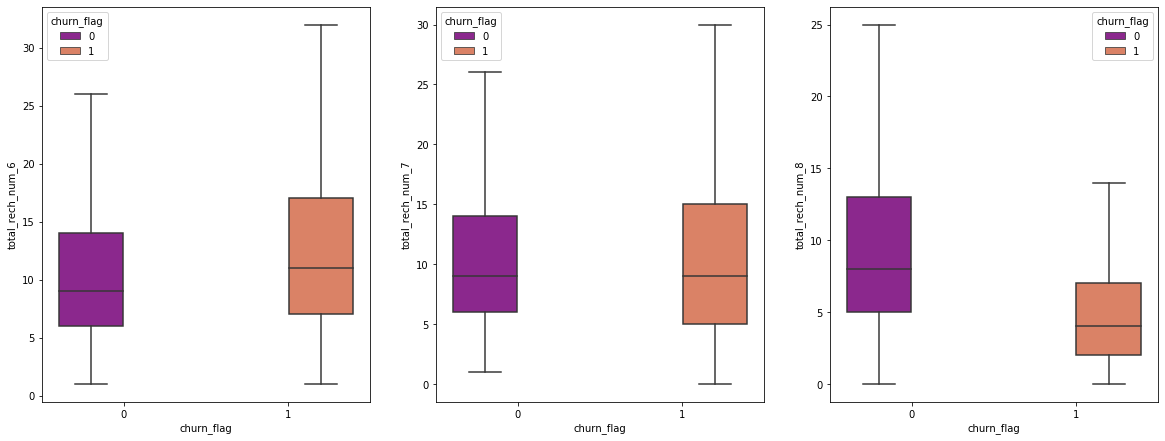

In [40]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')
#total recharge number drops in 8th month for churning customers

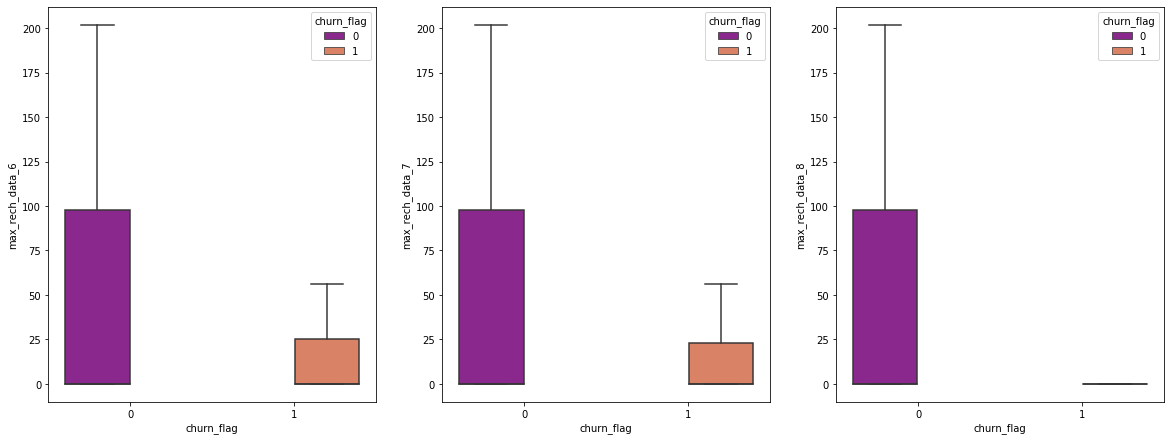

In [41]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')
#recharge data is almost going to nill in 8th month for churning customers

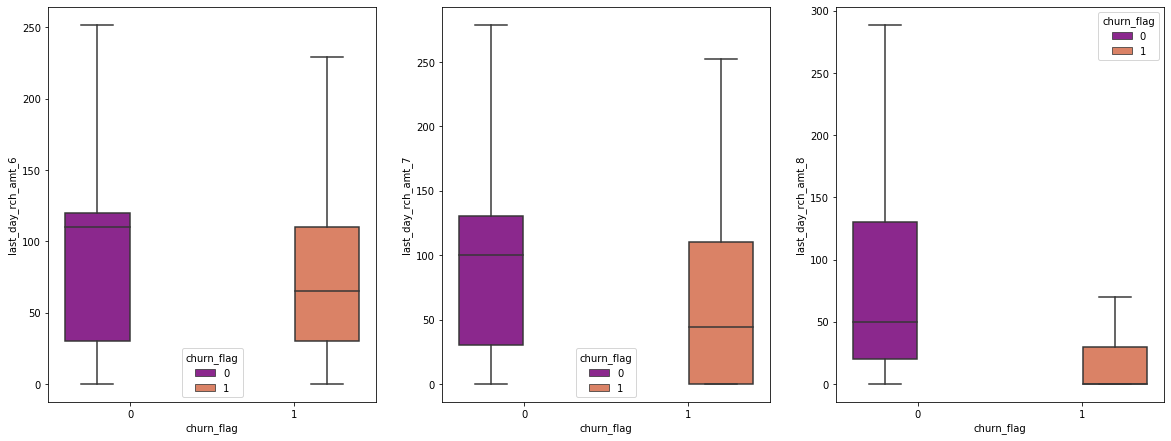

In [42]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

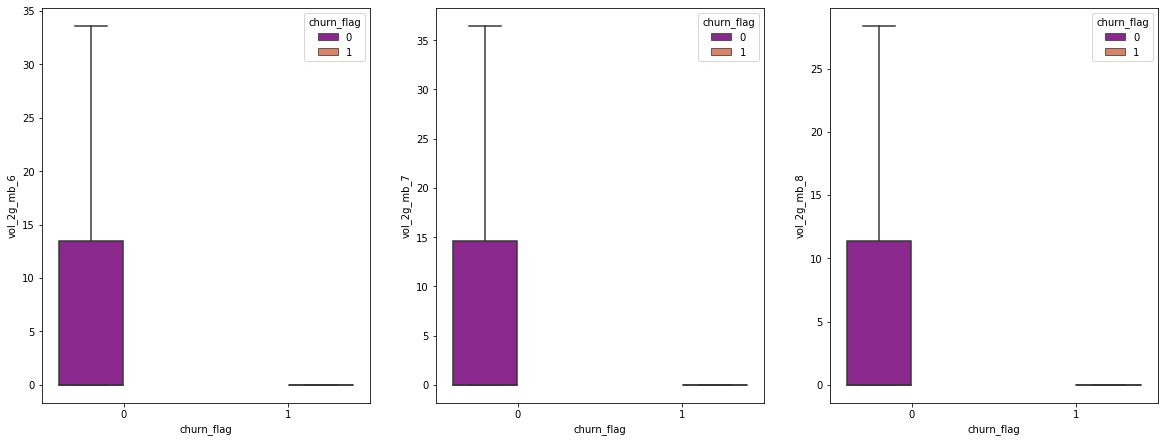

In [43]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

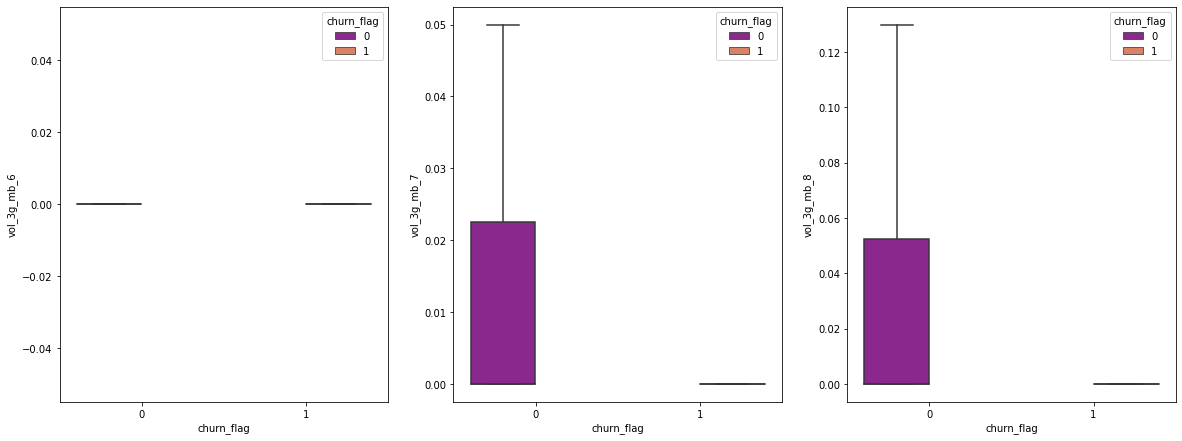

In [44]:
plot_box_chart('vol_3g_mb')

In [45]:
mou_og_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [46]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

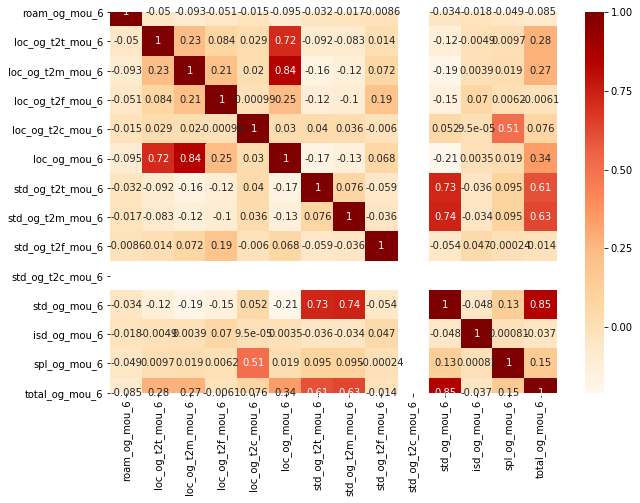

In [47]:
heatmap(10, 7,data_filtered.filter(mou_og_cols6))

In [48]:
print(data_filtered.loc[8,'total_og_mou_6'],"==",data_filtered.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(data_filtered.loc[8,'std_og_mou_6'],"==",data_filtered.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())
print(data_filtered.loc[8,'loc_og_mou_6'],"==",data_filtered.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

337.86 == 337.84999999999997
274.21 == 274.20000000000005
63.64 == 63.64


In [49]:
list_total_og_cols = data_filtered.columns[data_filtered.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
data_filtered.drop(list_total_og_cols,axis=1,inplace=True)
print("Columns dropped - ")
print(list_total_og_cols.tolist())

Columns dropped - 
['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [50]:
mou_ic_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_ic_.*mou_6',regex=True)]

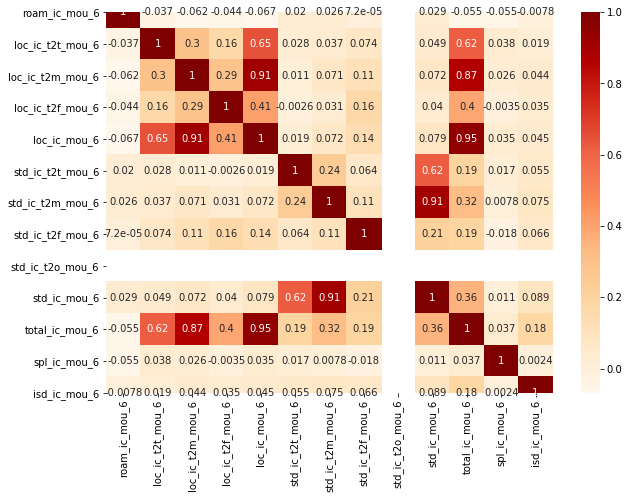

In [51]:
heatmap(10,7,data_filtered.filter(mou_ic_cols6))

In [52]:
print(data_filtered.loc[21,'total_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(data_filtered.loc[21,'loc_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())
print(data_filtered.loc[21,'std_ic_mou_6'],"==",data_filtered.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

392.69 == 392.68999999999994
350.78 == 350.76
41.91 == 41.9


In [53]:
list_total_ic_cols = data_filtered.columns[data_filtered.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
data_filtered.drop(list_total_ic_cols,axis=1,inplace=True)
print("Columns dropped - ")
list_total_ic_cols.tolist()

Columns dropped - 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [54]:
data_filtered.drop('avg_amt_data_6_7',axis=1,inplace=True)

In [55]:
col_list = data_filtered.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_filtered[avg_col_name] = (data_filtered[col_6]  + data_filtered[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_t2c_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_t2o_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
vbc_3g
amt_data
days_since_recharge


In [56]:
col_list_to_drop = data_filtered.filter(regex='_6|_7')
data_filtered.drop(col_list_to_drop,axis=1,inplace=True)
print (data_filtered.shape)

(26682, 102)


In [57]:

#SPLITTING DATA SET
# Putting feature variable to X
from sklearn.model_selection import train_test_split

X = data_filtered.drop(['churn_flag'],axis=1)

# Putting response variable to y
y = data_filtered['churn_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=100)
print ("Shape of Train dataset",X_train.shape, y_train.shape)
print ("Shape of Test dataset",X_test.shape, y_test.shape)


Shape of Train dataset (18677, 101) (18677,)
Shape of Test dataset (8005, 101) (8005,)


In [58]:
#TREATING CLASS IMBALANCE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
sm =  SMOTE(random_state = 27)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 1870
Before OverSampling, counts of label '0': 16807 

After OverSampling, the shape of train_X: (33614, 101)
After OverSampling, the shape of train_y: (33614,) 

After OverSampling, counts of label '1': 16807
After OverSampling, counts of label '0': 16807


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

train_after_scaling = scaler.transform(X_train)
test_after_scaling = scaler.transform(X_test)

In [60]:
logreg = LogisticRegression()

logreg.fit(train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')


In [61]:
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [62]:
y_pred = logreg.predict(test_after_scaling)

In [63]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [64]:
y_pred.size

8005

In [65]:
y_test

7533     0
26374    0
5745     1
6307     0
29940    1
        ..
12069    0
29304    0
12125    0
23030    0
5738     1
Name: churn_flag, Length: 8005, dtype: int32

In [66]:
printingMSEandRsquare(y_test, y_pred)

0.1495315427857589
-0.5658004910169778


In [67]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)


[[6138 1011]
 [ 186  670]]


In [68]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)


Acuracy Score 0.8504684572142411
Sensitivity:  0.7827102803738317
Specificity:  0.858581619806966
false postive rate:  0.141418380193034
positive predictive value:  0.3985722784057109
Negative predictive value:  0.9705882352941176
Misclassification Rate:  0.1495315427857589


In [69]:
x = train_after_scaling

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(random_state=42)

In [72]:
pca.fit(x)

PCA(random_state=42)

In [73]:
pca.components_

array([[-1.00554807e-19, -0.00000000e+00,  1.11022302e-16, ...,
         1.49524125e-01,  6.16859796e-02,  3.28804232e-02],
       [ 1.01670711e-18,  1.11022302e-16, -1.11022302e-16, ...,
        -5.00079532e-02,  2.13175715e-01, -1.14894894e-01],
       [-2.77748131e-19,  2.77555756e-17, -1.35308431e-16, ...,
        -5.05048835e-02, -5.81582082e-02, -1.33398980e-01],
       ...,
       [ 0.00000000e+00, -1.86713441e-01,  1.32875717e-01, ...,
         3.81639165e-17, -1.24997466e-02,  5.89805982e-17],
       [ 9.99999730e-01,  3.85880090e-05,  5.17471028e-04, ...,
         3.86247024e-19, -1.17017992e-04, -0.00000000e+00],
       [ 0.00000000e+00,  1.85746241e-01,  3.80109178e-02, ...,
        -1.45716772e-16,  4.04678918e-01,  1.00613962e-16]])

In [74]:
pca.explained_variance_ratio_

array([1.60499855e-01, 8.54618783e-02, 6.42769173e-02, 5.35859997e-02,
       3.63234719e-02, 3.39763030e-02, 3.31791950e-02, 2.66861548e-02,
       2.59358198e-02, 2.30856250e-02, 2.14585773e-02, 2.11834985e-02,
       2.04311486e-02, 1.89838560e-02, 1.73517860e-02, 1.59640694e-02,
       1.55719231e-02, 1.42026851e-02, 1.39392463e-02, 1.28765636e-02,
       1.23038216e-02, 1.21328930e-02, 1.13918736e-02, 1.09511349e-02,
       1.05004906e-02, 1.04062020e-02, 1.01650408e-02, 9.60325604e-03,
       9.57931626e-03, 9.33407465e-03, 9.09224002e-03, 8.81637595e-03,
       8.25880895e-03, 8.10588621e-03, 7.80207734e-03, 7.50328908e-03,
       7.46395613e-03, 6.88871391e-03, 6.56271458e-03, 6.38398340e-03,
       6.02443914e-03, 5.78814532e-03, 5.64368180e-03, 5.53978180e-03,
       5.39739835e-03, 4.61148749e-03, 4.43807286e-03, 4.26430036e-03,
       4.06190333e-03, 3.83532817e-03, 3.76921983e-03, 3.67165501e-03,
       3.43766833e-03, 3.38753202e-03, 3.14102316e-03, 3.01483642e-03,
      

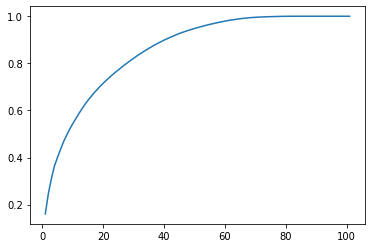

In [75]:
#70 components explain close to 90 percent of variace
import matplotlib.pyplot as plt
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [76]:
#pc2 = PCA(n_components=75, random_state=42)
from sklearn.decomposition import IncrementalPCA

pcaFinal = IncrementalPCA(n_components=70)
train_pca = pcaFinal.fit_transform(train_after_scaling)
train_pca.shape

(33614, 70)

In [77]:
#Applying selected components to the test data - 70 components
test_pca = pcaFinal.fit_transform(test_after_scaling)
test_pca.shape 


(8005, 70)

In [78]:
train_pca

array([[-1.02402139,  5.51316327, -1.13275052, ..., -0.07280639,
        -0.17947152, -0.20869183],
       [-2.24593588, -0.19621099, -0.68597497, ..., -0.10645215,
         0.08782773, -0.2986511 ],
       [-2.30477947,  0.70487734, -0.86235718, ..., -0.03421113,
        -0.18130863,  0.02489594],
       ...,
       [ 8.49068692, -4.76943756, -3.16261907, ...,  0.49340523,
        -0.39449792, -0.2021709 ],
       [-3.00889054, -2.36954657, -0.92225052, ...,  0.01262375,
        -0.01727464,  0.04829843],
       [-1.93828317, -1.169449  , -0.15810654, ..., -0.20256044,
         0.18573659,  0.06883738]])

In [79]:
y_train.shape

(33614,)

In [80]:
logreg = LogisticRegression()

logreg.fit(train_pca, y_train)

LogisticRegression()

In [81]:
y_pred = logreg.predict(test_pca)


In [82]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [83]:
y_pred.size

8005

In [84]:
y_test

7533     0
26374    0
5745     1
6307     0
29940    1
        ..
12069    0
29304    0
12125    0
23030    0
5738     1
Name: churn_flag, Length: 8005, dtype: int32

In [85]:
printingMSEandRsquare(y_test, y_pred)

0.508682073703935
-4.32659949826327


In [86]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)
y_pred_default = y_pred

[[3309 3840]
 [ 232  624]]


In [87]:
printingConfusionMetricDetails(confusion_matrix2)

Acuracy Score 0.49131792629606497
Sensitivity:  0.7289719626168224
Specificity:  0.4628619387326899
false postive rate:  0.5371380612673101
positive predictive value:  0.13978494623655913
Negative predictive value:  0.9344817848065519
Misclassification Rate:  0.508682073703935


In [88]:
# Decision tree after Logistic regression

# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [89]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      7149
           1       0.17      0.66      0.27       856

    accuracy                           0.63      8005
   macro avg       0.56      0.64      0.51      8005
weighted avg       0.86      0.63      0.70      8005

[[4444 2705]
 [ 292  564]]
Acuracy Score 0.6256089943785135


In [90]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
printingConfusionMetricDetails(confusion_tree)

Acuracy Score 0.6256089943785135
Sensitivity:  0.6588785046728972
Specificity:  0.6216254021541474
false postive rate:  0.3783745978458526
positive predictive value:  0.1725298256347507
Negative predictive value:  0.9383445945945946
Misclassification Rate:  0.3743910056214866


In [91]:
########## lets tune hyper parameters
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}


In [92]:
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)


In [93]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)


In [94]:
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy')

In [95]:
y_train.shape

(33614,)

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.364226,0.009961,0.003391,0.000489,1,{'max_depth': 1},0.695077,0.699093,0.694333,0.695374,...,0.699263,0.006790,39,0.702540,0.701499,0.701276,0.701796,0.696713,0.700765,0.002070
1,0.759369,0.026103,0.003590,0.000489,2,{'max_depth': 2},0.719322,0.716942,0.715306,0.719470,...,0.720533,0.005760,38,0.725038,0.725484,0.719758,0.722435,0.716012,0.721745,0.003525
2,1.181141,0.073356,0.003391,0.000489,3,{'max_depth': 3},0.745203,0.734791,0.748029,0.757102,...,0.744957,0.007595,37,0.755680,0.741103,0.758841,0.757131,0.742154,0.750982,0.007709
3,1.244575,0.028287,0.003790,0.000399,4,{'max_depth': 4},0.761119,0.766920,0.763052,0.776439,...,0.768579,0.006273,36,0.775501,0.770444,0.776170,0.778141,0.771307,0.774313,0.002950
4,1.490122,0.009176,0.003392,0.000489,5,{'max_depth': 5},0.779860,0.795181,0.786107,0.793842,...,0.790564,0.006622,35,0.796884,0.795991,0.798371,0.800714,0.796371,0.797666,0.001725


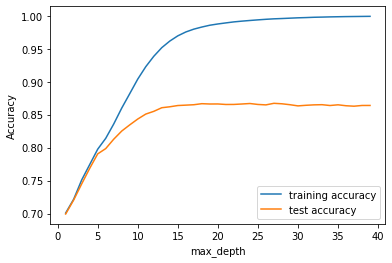

In [97]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [98]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True , n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.366353,0.169058,0.006583,3.191376e-03,5,{'min_samples_leaf': 5},0.843373,0.857653,0.851108,0.855422,...,0.852562,0.005057,1,0.958388,0.958127,0.958313,0.956751,0.959319,0.958180,0.000825
1,4.473955,0.243998,0.005785,1.716432e-03,25,{'min_samples_leaf': 25},0.828499,0.837721,0.826119,0.836531,...,0.833849,0.005534,2,0.886207,0.883976,0.884906,0.887286,0.885059,0.885487,0.001145
2,3.760372,0.321580,0.004987,3.568323e-07,45,{'min_samples_leaf': 45},0.821211,0.834300,0.823442,0.829540,...,0.828107,0.005005,3,0.862110,0.863002,0.859842,0.861143,0.859772,0.861174,0.001262
3,3.611159,0.196485,0.005186,3.993037e-04,65,{'min_samples_leaf': 65},0.819575,0.826714,0.820318,0.818682,...,0.821086,0.002871,4,0.847198,0.847905,0.847235,0.845339,0.846423,0.846820,0.000877
4,3.581818,0.090683,0.004389,4.886167e-04,85,{'min_samples_leaf': 85},0.812286,0.821806,0.813030,0.819575,...,0.817368,0.003922,5,0.839798,0.838347,0.836376,0.838385,0.839432,0.838468,0.001191


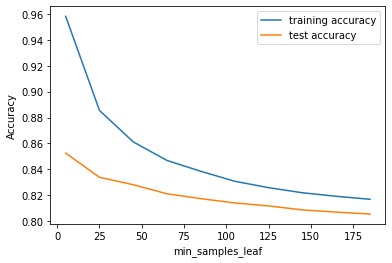

In [100]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 75

In [101]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [102]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.545811,0.363630,0.004987,3.162980e-07,5,{'min_samples_split': 5},0.851257,0.863900,0.857802,0.866875,...,0.861814,0.006521,1,0.992934,0.993269,0.993083,0.993604,0.993530,0.993284,0.000255
1,5.771906,0.130397,0.004987,1.907349e-07,25,{'min_samples_split': 25},0.834449,0.855719,0.844712,0.852447,...,0.848813,0.008329,2,0.950467,0.952252,0.954632,0.951768,0.948721,0.951568,0.001960
2,5.924565,0.144899,0.005984,2.601311e-03,45,{'min_samples_split': 45},0.831028,0.839506,0.836978,0.846646,...,0.840602,0.006491,3,0.929010,0.925477,0.927411,0.927968,0.925145,0.927002,0.001477
3,5.667919,0.264382,0.005186,3.991609e-04,65,{'min_samples_split': 65},0.821954,0.832664,0.830284,0.836383,...,0.832719,0.006741,4,0.913614,0.909858,0.909896,0.909933,0.908635,0.910387,0.001686
4,5.501423,0.269252,0.006184,1.934308e-03,85,{'min_samples_split': 85},0.821062,0.834003,0.827458,0.833705,...,0.830428,0.005480,5,0.902421,0.899743,0.898330,0.898107,0.895173,0.898755,0.002360


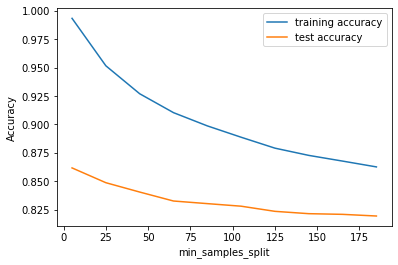

In [103]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [104]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 20, 5),
    'min_samples_leaf': range(5, 75, 20),
    'min_samples_split': range(5, 75, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  6.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 20, 5),
                         'min_samples_leaf': range(5, 75, 20),
                         'min_samples_split': range(5, 75, 20)},
             refit='recall_score', verbose=1)

In [105]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.286238,0.772256,0.006782,0.003116,entropy,10,5,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.819426,0.827012,0.832515,0.823739,0.825350,0.825608,0.004277,35
1,5.882369,0.214323,0.005187,0.000399,entropy,10,5,25,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.817790,0.826714,0.828350,0.819872,0.824011,0.823347,0.003994,38
2,5.826207,0.236216,0.005386,0.000798,entropy,10,5,45,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.815559,0.824186,0.823442,0.818087,0.822969,0.820849,0.003405,39
3,5.370416,0.111843,0.006981,0.004137,entropy,10,5,65,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.810204,0.822996,0.822401,0.817641,0.820589,0.818766,0.004669,53
4,5.744662,0.043498,0.004787,0.000399,entropy,10,25,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.816748,0.820318,0.817938,0.818385,0.819697,0.818617,0.001270,54


In [106]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8541084854697532
DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5)


In [107]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [108]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[5013, 2136],
       [ 438,  418]], dtype=int64)

In [109]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.6784509681449095
Sensitivity:  0.4883177570093458
Specificity:  0.7012169534200587
false postive rate:  0.29878304657994126
positive predictive value:  0.16366483946750196
Negative predictive value:  0.9196477710511832
Misclassification Rate:  0.3215490318550906


In [110]:
# Random forest

# Importing random forest classifier from sklearn library
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [111]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[6217,  932],
       [ 563,  293]], dtype=int64)

In [112]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.8132417239225485
Sensitivity:  0.4883177570093458
Specificity:  0.7012169534200587
false postive rate:  0.29878304657994126
positive predictive value:  0.16366483946750196
Negative predictive value:  0.9196477710511832
Misclassification Rate:  0.3215490318550906


In [113]:
#Lets do some hyper parameter tuning  for RF

# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [114]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.206633,0.214840,0.082779,0.002891,2,{'max_depth': 2},0.760375,0.773613,0.769448,0.772869,...,0.772327,0.008028,4,0.772229,0.774497,0.773828,0.773753,0.775324,0.773926,0.001020
1,20.017396,0.042644,0.110220,0.004988,7,{'max_depth': 7},0.839209,0.852893,0.850216,0.841737,...,0.846195,0.005104,3,0.867019,0.861887,0.863002,0.859990,0.860628,0.862505,0.002484
2,30.235066,0.332235,0.182614,0.018670,12,{'max_depth': 12},0.907631,0.915960,0.914473,0.911052,...,0.911495,0.003279,2,0.960210,0.962218,0.959168,0.960582,0.959096,0.960255,0.001139
3,33.229252,2.637411,0.147323,0.030776,17,{'max_depth': 17},0.935297,0.943478,0.937528,0.934107,...,0.937348,0.003267,1,0.985571,0.987319,0.985980,0.987096,0.986130,0.986419,0.000673


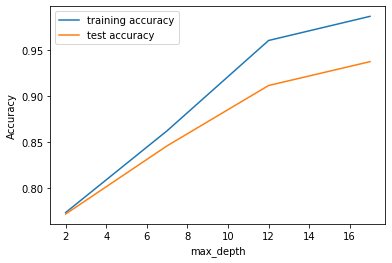

In [115]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 11 to 13

In [116]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, verbose = 1, return_train_score=True)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 17.9min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.260635,0.049137,0.130056,0.004578,100,{'n_estimators': 100},0.886658,0.896029,0.892012,0.886955,...,0.889689,0.003759,4,0.929530,0.926593,0.928006,0.926258,0.929273,0.927932,0.001338
1,137.877806,9.363663,0.810737,0.076389,500,{'n_estimators': 500},0.887699,0.895136,0.892310,0.888443,...,0.891504,0.002952,2,0.930720,0.928787,0.928303,0.927783,0.931318,0.929382,0.001387
2,264.749801,11.250326,1.248961,0.069876,900,{'n_estimators': 900},0.886509,0.896772,0.891715,0.887401,...,0.890522,0.003645,3,0.931650,0.929233,0.928973,0.928675,0.930909,0.929888,0.001173
3,328.459404,40.909434,1.531421,0.361210,1300,{'n_estimators': 1300},0.887848,0.897219,0.893797,0.888591,...,0.891831,0.003443,1,0.930981,0.930534,0.928638,0.927597,0.930016,0.929553,0.001255


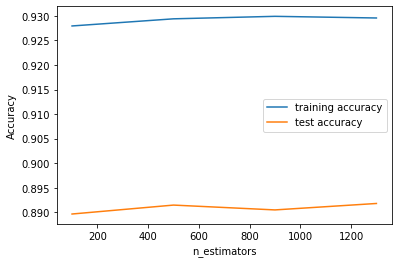

In [118]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [119]:
# GridSearchCV to find optimal max_features
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.2min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.084018,0.160613,0.176512,0.020502,4,{'max_features': 4},0.876692,0.892607,0.890079,0.885468,...,0.886387,0.005434,5,0.924584,0.923915,0.923209,0.923023,0.924848,0.923916,0.000723
1,27.882263,0.153193,0.142619,0.008486,8,{'max_features': 8},0.885617,0.893946,0.889781,0.885617,...,0.888915,0.003109,4,0.929196,0.928340,0.926109,0.925254,0.929868,0.927753,0.001780
2,47.472606,0.301582,0.152193,0.015445,14,{'max_features': 14},0.890228,0.897813,0.894392,0.891269,...,0.893348,0.002653,3,0.935889,0.931650,0.932319,0.929791,0.933475,0.932625,0.002023
3,66.575428,1.562641,0.151196,0.023420,20,{'max_features': 20},0.893202,0.900640,0.895136,0.895582,...,0.896382,0.002505,2,0.937786,0.936038,0.935517,0.935555,0.937342,0.936448,0.000940
4,72.340023,5.839891,0.124467,0.028881,24,{'max_features': 24},0.894392,0.901235,0.892905,0.894541,...,0.896442,0.003180,1,0.938604,0.937563,0.936410,0.936633,0.938606,0.937563,0.000934


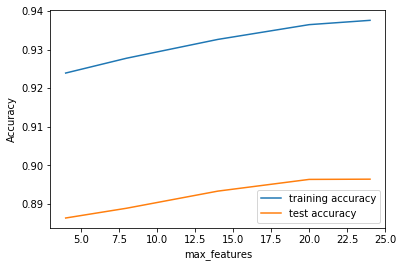

In [121]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 12

In [122]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.160682,0.399426,0.136441,0.007737,100,{'min_samples_leaf': 100},0.833408,0.857355,0.847241,0.842779,...,0.846433,0.008093,1,0.864155,0.862407,0.860362,0.859433,0.863417,0.861955,0.001793
1,24.975578,1.895112,0.165158,0.017258,150,{'min_samples_leaf': 150},0.823293,0.842927,0.837424,0.832813,...,0.836378,0.007873,2,0.851623,0.847012,0.847681,0.848611,0.850922,0.849170,0.001804
2,26.762728,1.014027,0.173935,0.047415,200,{'min_samples_leaf': 200},0.817938,0.838316,0.831325,0.828648,...,0.830785,0.007408,3,0.843925,0.840318,0.842475,0.842475,0.840733,0.841985,0.001311
3,27.265536,0.572969,0.143017,0.015277,250,{'min_samples_leaf': 250},0.814220,0.830730,0.828648,0.822847,...,0.825668,0.006516,4,0.837827,0.833811,0.836191,0.837455,0.834263,0.835909,0.001628
4,28.352386,1.890365,0.161568,0.032138,300,{'min_samples_leaf': 300},0.812732,0.830879,0.823888,0.823442,...,0.823883,0.006238,5,0.834777,0.830017,0.831765,0.834517,0.829094,0.832034,0.002301


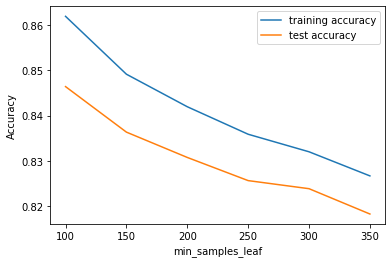

In [124]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [125]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [126]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,39.068557,0.761595,0.204454,0.013125,200,{'min_samples_split': 200},0.842035,0.868511,0.862413,0.864941,...,0.861100,0.009769,1,0.893087,0.887397,0.884831,0.889182,0.887364,0.888372,0.002735
1,36.087609,1.043224,0.186900,0.030274,250,{'min_samples_split': 250},0.835788,0.861669,0.860181,0.856760,...,0.855150,0.009836,2,0.881670,0.877803,0.875906,0.876910,0.879369,0.878332,0.002020
2,34.800658,0.768187,0.146311,0.017990,300,{'min_samples_split': 300},0.834895,0.862264,0.849323,0.849472,...,0.850866,0.009441,3,0.874531,0.868655,0.869659,0.868543,0.869106,0.870099,0.002250
3,34.471852,0.415447,0.171851,0.024667,350,{'min_samples_split': 350},0.826714,0.852298,0.848431,0.843820,...,0.844916,0.009695,4,0.867167,0.861738,0.863077,0.863783,0.864421,0.864037,0.001801
4,35.087831,0.613362,0.180823,0.020544,400,{'min_samples_split': 400},0.824186,0.848282,0.847985,0.842481,...,0.842387,0.009393,5,0.861069,0.856532,0.858428,0.858912,0.860107,0.859010,0.001545


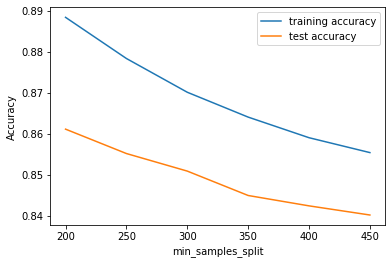

In [127]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [128]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [11,13],
    'min_samples_leaf': range(100, 150, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(300, 600, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, n_jobs=-1, verbose = 1)

In [129]:
# Fit the grid search to the data
grid_search.fit(train_pca, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 47.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [11, 13], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 150, 50),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(300, 600, 100)},
             refit='recall_score', verbose=1)

In [130]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy got is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy got is 0.8449159537644144 using {'max_depth': 13, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [131]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=13,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=400)

In [132]:
rfc.fit(train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=13, max_features=10,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=400)

In [133]:
# predict
y_pred_default = rfc.predict(test_pca)

In [134]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[4878, 2271],
       [ 332,  524]], dtype=int64)

In [135]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.6748282323547783
Sensitivity:  0.4883177570093458
Specificity:  0.7012169534200587
false postive rate:  0.29878304657994126
positive predictive value:  0.16366483946750196
Negative predictive value:  0.9196477710511832
Misclassification Rate:  0.3215490318550906


In [136]:

#first logistic reg - accu - 86, Se - 76 , Spec - 86
# PCA - Logisc - acc-52, Sen - 66, Sepc - 50
# DT - first - Acc - 52, Sen -69 , Spec - 61
# DT - tuning - Acc - 62, Sen - 44, Spec - 63
# RF - - first - Acc  81, Sen - 48, Sepc - 70
# RF - post tuning - Acc - 67 Sen - 49, Sepc -70
# 
# RF seems to have hte highest Accuracy post PCA

In [137]:
# let us use Logistic regression and  RF on full data set to get the important parameters

In [138]:
# logistic regression first
logreg = LogisticRegression()

logreg.fit(train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')

In [139]:
y_pred = logreg.predict(test_after_scaling)

In [140]:
printingMSEandRsquare(y_test, y_pred)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)


0.1495315427857589
-0.5658004910169778
[[6138 1011]
 [ 186  670]]
Acuracy Score 0.8504684572142411
Sensitivity:  0.7827102803738317
Specificity:  0.858581619806966
false postive rate:  0.141418380193034
positive predictive value:  0.3985722784057109
Negative predictive value:  0.9705882352941176
Misclassification Rate:  0.1495315427857589


In [141]:
gridSearchForLR(lr,train_after_scaling,y_train)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.8637190055436959


In [142]:
logreg_afterTuning=LogisticRegression(C=1000,penalty="l2")
logreg_afterTuning.fit(train_after_scaling, y_train)

LogisticRegression(C=1000)

In [143]:
y_pred = logreg_afterTuning.predict(test_after_scaling)

In [144]:
printingMSEandRsquare(y_test, y_pred)

0.14828232354778265
-0.5527194509917732


In [145]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)

[[6157  992]
 [ 195  661]]


In [146]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)

Acuracy Score 0.8517176764522174
Sensitivity:  0.772196261682243
Specificity:  0.8612393341726116
false postive rate:  0.13876066582738844
positive predictive value:  0.3998790078644888
Negative predictive value:  0.969301007556675
Misclassification Rate:  0.14828232354778265


In [147]:
#Printing importance table for Logistic Regression
importance = logreg_afterTuning.coef_[0]
impFeaturesforModels(importance)

[('total_rech_data_8',
  23.379612337112167),
 ('count_rech_2g_8',
  19.866706513492804),
 ('count_rech_3g_8',
  15.555286466471395),
 ('std_og_t2m_mou_8',
  1.2776039843060158),
 ('avg_std_og_t2t_mou_av67',
  0.9635342389333418),
 ('amt_data_8',
  0.9180919133112446),
 ('onnet_mou_8',
  0.7606445595095362),
 ('avg_offnet_mou_av67',
  0.5639259223288725),
 ('avg_arpu_2g_av67',
  0.5052849026170182),
 ('avg_total_rech_num_av67',
  0.47047068426286015),
 ('avg_loc_og_t2t_mou_av67',
  0.4173736472165539),
 ('avg_loc_ic_t2m_mou_av67',
  0.36374263985453775),
 ('roam_og_mou_8',
  0.31935725011183946),
 ('avg_max_rech_data_av67',
  0.28305594228291653),
 ('loc_og_t2m_mou_8',
  0.2401259238354524),
 ('arpu_8',
  0.2176787219425597),
 ('max_rech_data_8',
  0.1943492155500038),
 ('arpu_2g_8',
  0.1938763243431979),
 ('avg_arpu_av67',
  0.18766115022052743),
 ('avg_isd_og_mou_av67',
  0.13622929879143456),
 ('avg_vol_3g_mb_av67',
  0.13084051483517953),
 ('avg_monthly_2g_av67',
  0.1037670540617

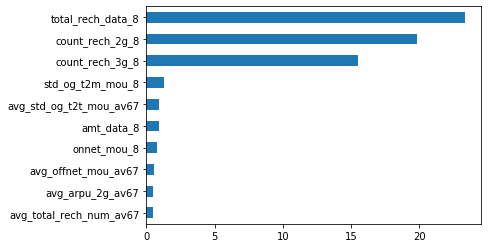

In [148]:

weights = pd.Series(importance,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [149]:
# Model with Best Hyper Parameters
rfc_with_HyperParams = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [150]:
rfc_with_HyperParams.fit(train_after_scaling,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=12,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200)

In [151]:
# predict
y_pred_default = rfc_with_HyperParams.predict(test_after_scaling)

In [152]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[6425,  724],
       [ 165,  691]], dtype=int64)

In [153]:
printingConfusionMetricDetails(confusion_rf_hyper)

Acuracy Score 0.8889444097439101
Sensitivity:  0.8072429906542056
Specificity:  0.8987270946985593
false postive rate:  0.10127290530144076
positive predictive value:  0.488339222614841
Negative predictive value:  0.9749620637329287
Misclassification Rate:  0.11105559025608995


In [154]:
#Printing importance table for Random Forest
importance = rfc_with_HyperParams.feature_importances_
impFeaturesforModels(importance)
# let us use RF on full data set to get the important parameters

[('loc_ic_t2m_mou_8',
  0.09308443914939613),
 ('roam_og_mou_8',
  0.08926016437075364),
 ('total_rech_amt_8',
  0.0860704372054378),
 ('amt_data_8',
  0.08551988129438849),
 ('loc_og_t2m_mou_8',
  0.07252112752365174),
 ('roam_ic_mou_8',
  0.07177636218407245),
 ('arpu_8',
  0.06883195629603595),
 ('last_day_rch_amt_8',
  0.05619366706524087),
 ('offnet_mou_8',
  0.04324449958651979),
 ('max_rech_amt_8',
  0.034789204415821805),
 ('days_since_recharge_8',
  0.03316322108047995),
 ('loc_ic_t2t_mou_8',
  0.02536573640558227),
 ('loc_og_t2t_mou_8',
  0.022800184494132944),
 ('night_pck_user_8',
  0.02200922042561949),
 ('fb_user_8',
  0.014187896043432919),
 ('onnet_mou_8',
  0.012960111473664469),
 ('total_rech_num_8',
  0.010544365756673264),
 ('total_rech_data_8',
  0.008231763083121207),
 ('max_rech_data_8',
  0.008178911596072362),
 ('std_ic_t2m_mou_8',
  0.00755118826261836),
 ('avg_loc_og_t2m_mou_av67',
  0.005934471443897742),
 ('avg_loc_og_t2c_mou_av67',
  0.0058582732585889955)

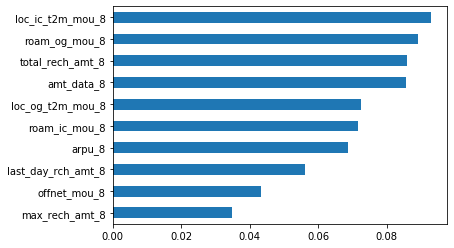

In [155]:
weights = pd.Series(importance,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [156]:
#top parameters of LR
# 1) total_rech_data_8 2)count_rech_2g_8 3) count_rech_3g_8 4)std_og_t2m_mou_8 5)avg_std_og_t2t_mou_av67
# 6)amt_data_8 7)onnet_mou_8 8)avg_offnet_mou_av67 9) avg_arpu_2g_av67 10) avg_total_rech_num_av67

#top parameters for RF
#1)total_rech_amt_8 2) roam_og_mou_8 3) amt_data_8 4)loc_ic_t2m_mou_8 5)roam_ic_mou_8
#6)loc_og_t2m_mou_8 7)arpu_8 8)offnet_mou_8 9) last_day_rch_amt_8 10)loc_ic_t2t_mou_8

In [157]:
# observations
# 1) Total rechargeable amount (and total rech data included there) for month 8 seems to be a strong indicator
# 2) Number of times customer recharges for 2g and 3g data are also strong indicators of Churn
# 3) Average revenue per user - dipping is a strong indicator of Churn
